In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset using the sklearn module. 

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

Viewing the different rows and columns of the dataset. 

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0 - Setosa

---


1 - Versicolor

---


2 - Virginica

We now use Classification as a supervised learning in which we use to categorise the different values. 

Using scikit-learn module we can implement the KNN algorithm that uses the numpy arrays for the different variables and they should be numeric. Hence, we classify them as 0, 1, 2 mapping to Setosa, Versicolor and Virginica respectively. 


In [ ]:
type(iris.data)

numpy.ndarray

In [ ]:
type(iris.target)

numpy.ndarray

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_3.fit(iris.data,iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred = knn_3.predict(iris.data)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
metrics.accuracy_score(iris.target,pred)

0.96

In [ ]:
knn_3.predict([[4,3,5,2]])

array([2])

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(iris.data,iris.target)
pred = knn_5.predict(iris.data)
metrics.accuracy_score(iris.target,pred)

0.9666666666666667

In [ ]:
knn_5.predict([[4,3,5,2]])

array([1])

Using train/test split

In [ ]:
x = iris.data
y = iris.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [ ]:
x_train.shape

(100, 4)

In [ ]:
x_test.shape

(50, 4)

In [ ]:
y_train.shape

(100,)

In [ ]:
y_test.shape

(50,)

In [ ]:
knn_3.fit(x_train,y_train)
pred = knn_3.predict(x_test)
metrics.accuracy_score(y_test,pred)

0.96

In [ ]:
knn_5.fit(x_train,y_train)
pred = knn_5.predict(x_test)
metrics.accuracy_score(y_test,pred)

0.96

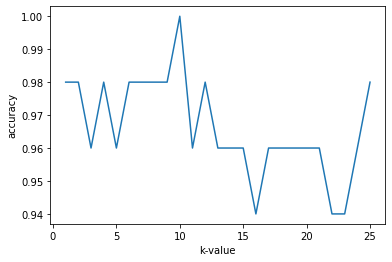

In [ ]:
accu_scores = np.array([])

for k in np.arange(1,26,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  pred_values = knn.predict(x_test)
  one_score = metrics.accuracy_score(y_test,pred_values)
  accu_scores = np.append(accu_scores,one_score)

plt.plot(np.arange(1,26,1),accu_scores)
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.show()

In [ ]:
print(accu_scores)

[0.98 0.98 0.96 0.98 0.96 0.98 0.98 0.98 0.98 1.   0.96 0.98 0.96 0.96
 0.96 0.94 0.96 0.96 0.96 0.96 0.96 0.94 0.94 0.96 0.98]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

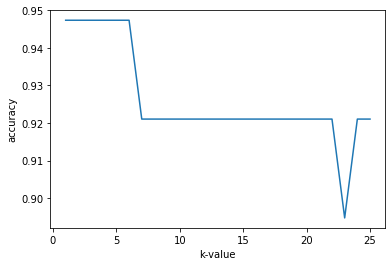

In [ ]:
accu_scores = np.array([])

for k in np.arange(1,26,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  pred_values = knn.predict(x_test)
  one_score = metrics.accuracy_score(y_test,pred_values)
  accu_scores = np.append(accu_scores,one_score)

plt.plot(np.arange(1,26,1),accu_scores)
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.show()

In [ ]:
print(accu_scores)

[0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.92105263 0.92105263 0.92105263 0.92105263 0.92105263 0.92105263
 0.92105263 0.92105263 0.92105263 0.92105263 0.92105263 0.92105263
 0.92105263 0.92105263 0.92105263 0.92105263 0.89473684 0.92105263
 0.92105263]


From the above two graphs we see the value of k has the max accuracy for k = 9 and when splitting it 25% & 75% we see the value as k = {1,2,3,4,5}. 

Testing accuracy is of high variance i.e., it can change a lot depending on the observations. This is way we say testing accuracy as high variance estimate. 

To solve this problem, we can try averaging the testing accuracies for creating a bunch of train/test split. This can be done by using cross validation. 


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
accu_scores = []

for k in np.arange(1,26,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    one_scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    accu_scores = np.append(accu_scores,one_scores.mean())

print(accu_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667]


Text(0, 0.5, 'Cross-Validated Accuracy')

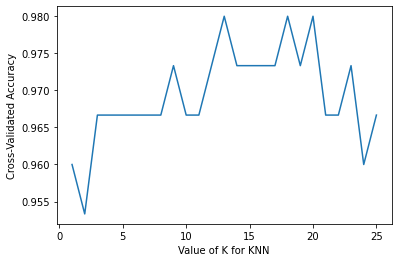

In [ ]:
plt.plot(np.arange(1,26,1), accu_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(iris.data,iris.target)
pred = knn.predict([[5.3, 3.0, 4.5, 1.5]])
pred

array([1])

In [ ]:
knn.predict([[5.8,4,1.2,0.2]])

array([0])

In [ ]:
knn.predict([[5.7,2.5,5,2]])

array([2])

In [ ]:
pred = knn.predict(iris.data)
metrics.accuracy_score(iris.target,pred)

0.98

In [ ]:

kf = KFold(n_splits=5,shuffle=False).split(np.arange(1,11,1))
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [2 3 4 5 6 7 8 9]           [0 1]          
    2     [0 1 4 5 6 7 8 9]           [2 3]          
    3     [0 1 2 3 6 7 8 9]           [4 5]          
    4     [0 1 2 3 4 5 8 9]           [6 7]          
    5     [0 1 2 3 4 5 6 7]           [8 9]          


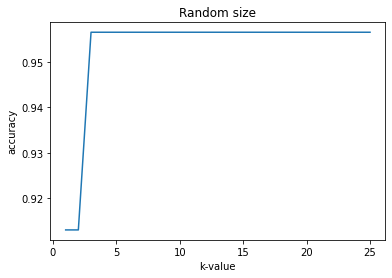

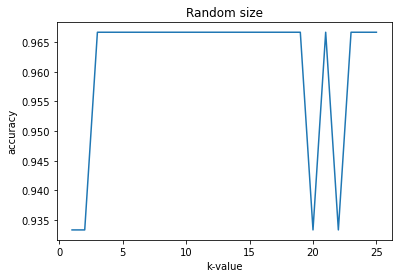

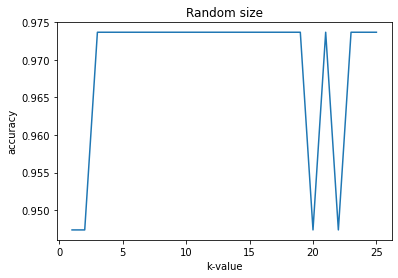

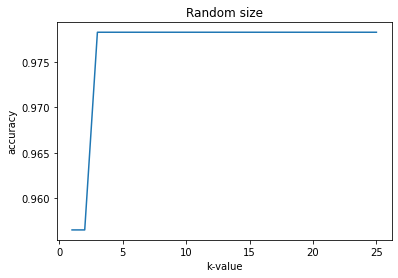

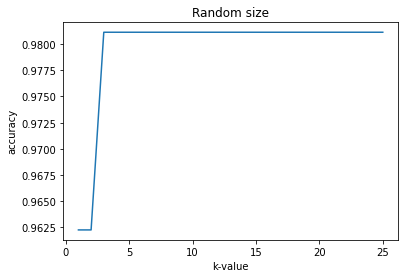

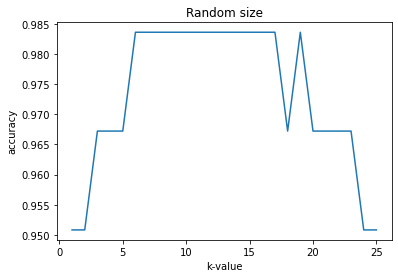

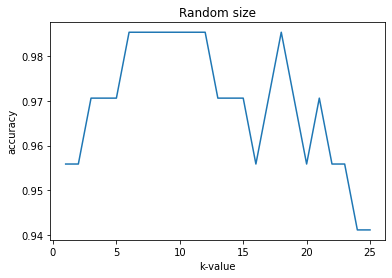

In [ ]:
#for random_size in np.arange(0.15,0.45,0.05):
  
#  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = random_size,random_state = 4)
  
#  accu_scores = np.array([])
  
#  for k in np.arange(1,26,1):
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(x_train,y_train)
#    pred_values = knn.predict(x_test)
#    one_score = metrics.accuracy_score(y_test,pred_values)
#    accu_scores = np.append(accu_scores,one_score)
  
#  plt.title('Random size')
#  plt.plot(np.arange(1,26,1),accu_scores)
#  plt.xlabel('k-value')
#  plt.ylabel('accuracy')
#  plt.show() 
